<a href="https://colab.research.google.com/github/TirilaPatricGabriel/ML/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[ 50079.4372829   90167.54115384  66580.94164666  76081.18239475
 188606.80299136 170201.87636581 160135.58222834  45517.21475856
 117458.63590979 172386.48556081]
[[ 50079.4372829   14681.4       ]
 [ 90167.54115384  96712.8       ]
 [ 66580.94164666  81229.06      ]
 [ 76081.18239475  78239.91      ]
 [188606.80299136 192261.83      ]
 [170201.87636581 182901.99      ]
 [160135.58222834 156991.12      ]
 [ 45517.21475856  64926.08      ]
 [117458.63590979 118474.03      ]
 [172386.48556081 166187.94      ]]


      Predictions     Actual
0   129990.486397  141585.52
1   175590.799057  166187.94
2   128657.896053  134307.35
3    96355.784155   89949.14
4    56399.238218   35673.41
5    49631.171550   64926.08
6   114992.704889  110352.25
7    50600.559396   14681.40
8   148781.785951  132602.65
9   166918.354738  156991.12
10  148446.322399  129917.04
11  137925.816144  146121.95
12  117536.208081  108552.04
13  118633.616529  118474.03
14  100018.051271   96778.92
15   74105.297544   71498.49
16   61925.373589   69758.98
R-squared: 0.8902490207967159
MSE: 188308993.61624557


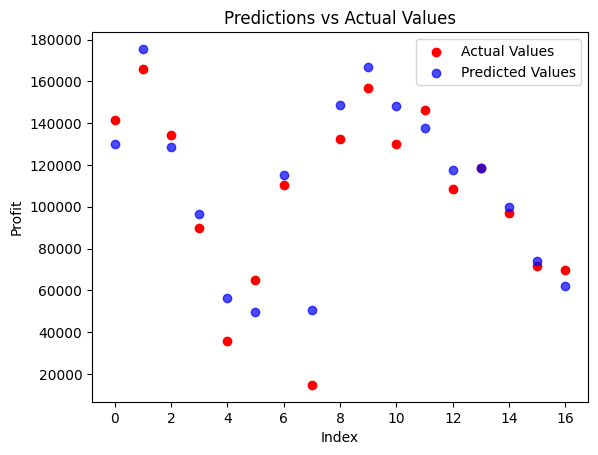

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

results = pd.DataFrame({
    "Predictions": predictions,
    "Actual": y_test
})

print(results)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
print("R-squared:", r2)
print("MSE:", mse)

plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values')
plt.scatter(range(len(predictions)), predictions, color='blue', label='Predicted Values', alpha=0.7)
plt.title('Predictions vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.legend()
plt.show()